In [21]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

import matplotlib as mp
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mp.rc('font',family= font_name)

Text(0.5, 0, '시간(분)')

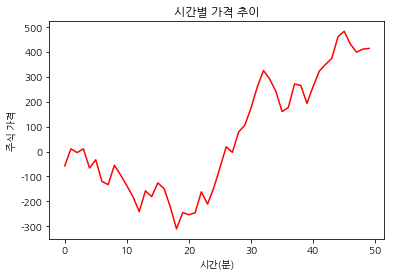

In [24]:
data = np.random.randint(-100, 100, 50).cumsum()
data
plt.plot(range(50), data, 'r')
mp.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

In [8]:
# 한글 정상적으로 출력 encoding="CP949"
# matplotlib.rc('font',family='Malgun Gothic')
df_fitness = pd.read_csv("/home/pirl/Downloads/BigDataAnalysis/FITNESS.csv", encoding="CP949",engine="python")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [9]:
df_currency = pd.read_csv("/home/pirl/Downloads/BigDataAnalysis/환율.csv" ,encoding="CP949", engine="python", parse_dates = ["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


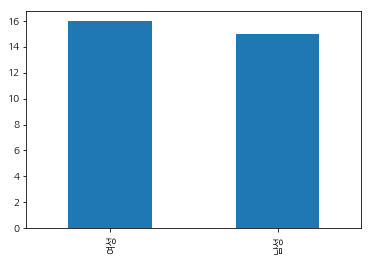

In [17]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

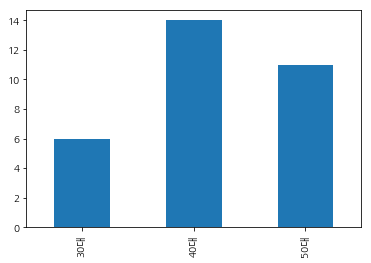

In [15]:
# 연령대 바 차트
df_count = df_fitness["AGEGROUP"].value_counts()

df_count.sort_index(inplace = True);
df_count.plot.bar()

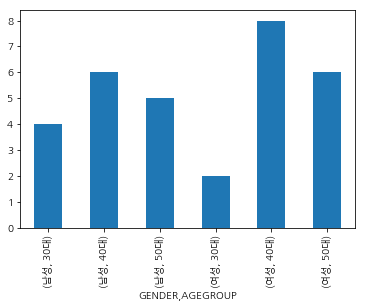

In [16]:
df_groupby_total = df_fitness.groupby(["GENDER","AGEGROUP"], as_index = False).size()
df_groupby_total.plot.bar()

p.56

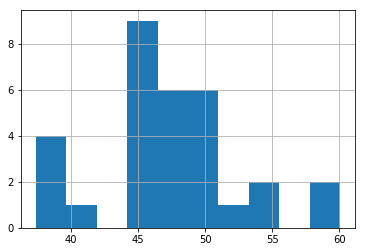

In [13]:
df_fitness["OXY"].hist()

In [23]:
import matplotlib as mp
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mp.rc('font',family= font_name)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a41cd50b8>,
      dtype=object)

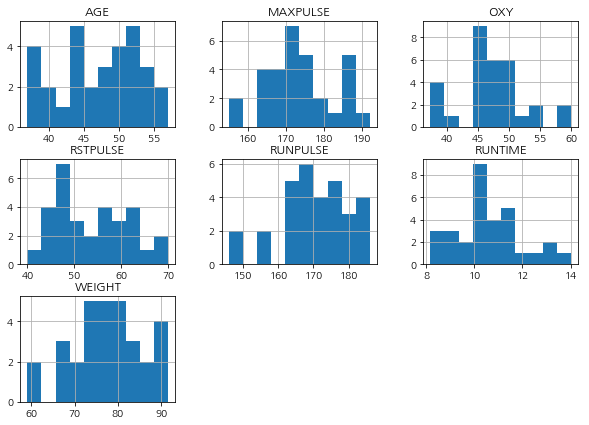

In [25]:
# p.57
df_fitness.hist(figsize = (10,7))

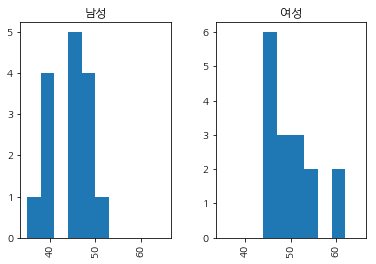

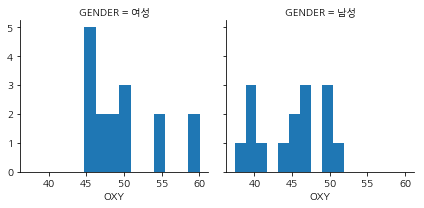

In [26]:
df_fitness.hist(column="OXY", by="GENDER", range=(35,65))
grid=sns.FacetGrid(df_fitness,col="GENDER")
grid.map(plt.hist,"OXY")

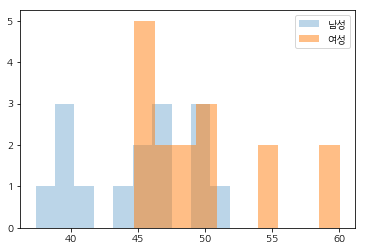

In [28]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"],label="남성",alpha=0.3)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"],label="여성",alpha=0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

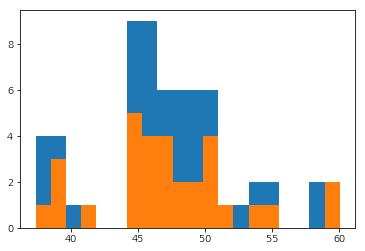

In [29]:
plt.hist(x = 'OXY',data = df_fitness)
plt.hist(x = 'OXY',data = df_fitness,bins=20)


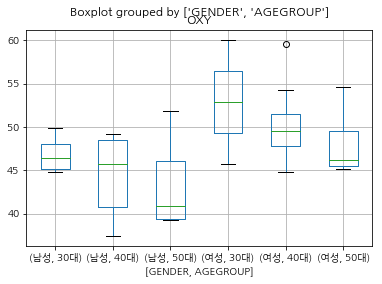

In [30]:
df_fitness.boxplot(column="OXY",by=["GENDER","AGEGROUP"])

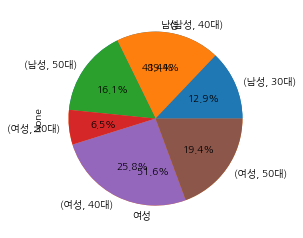

In [32]:
#P.65
df_count = df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY",autopct="%.1f%%")

df_count=df_fitness.groupby(["GENDER","AGEGROUP"]).size()
df_count.plot.pie(y="OXY",autopct = "%.1f%%")

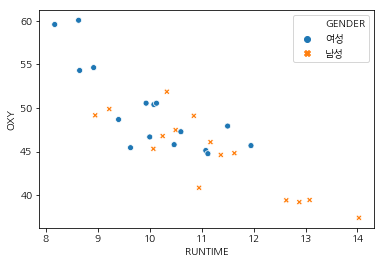

In [33]:
#p.69
sns.scatterplot(x="RUNTIME", y="OXY", hue = "GENDER", style="GENDER",data=df_fitness)

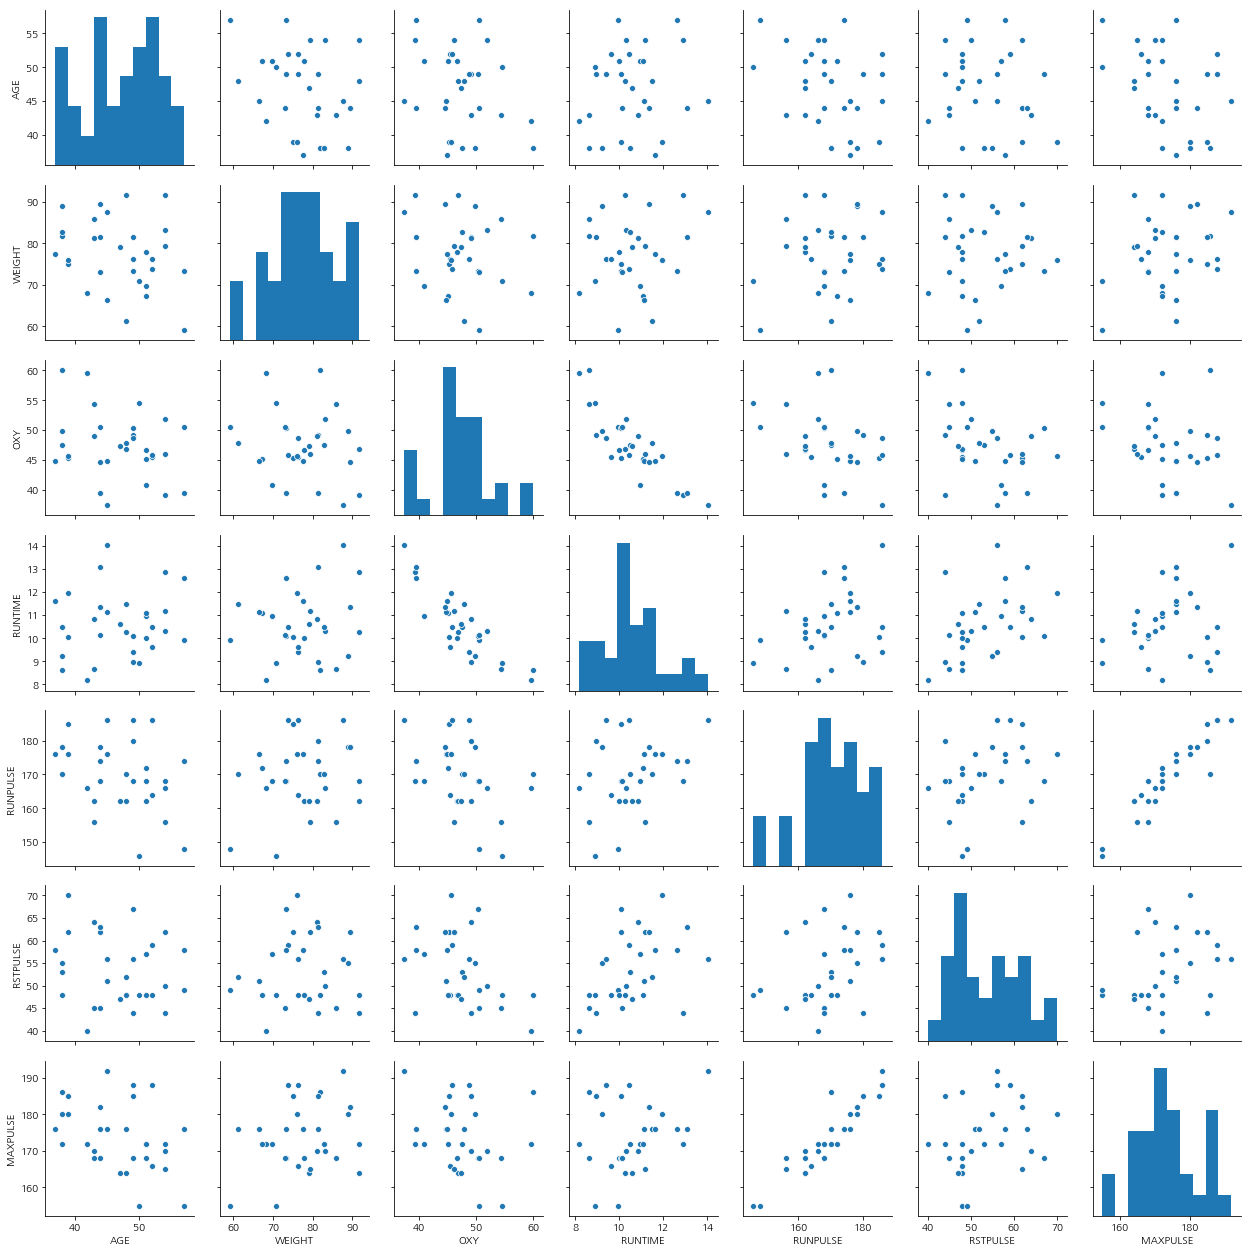

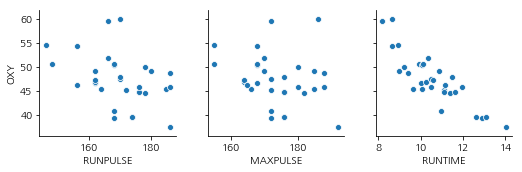

In [34]:
#p.72
sns.pairplot(df_fitness)
sns.pairplot(df_fitness, y_vars=["OXY"],x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

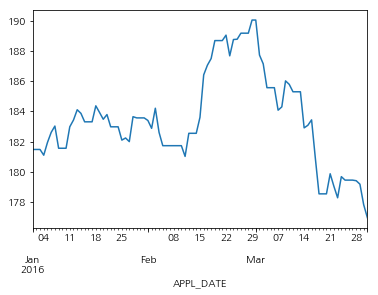

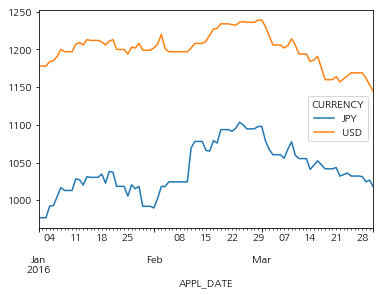

In [35]:
#p.76
df_currency_pivot=df_currency.pivot(index="APPL_DATE",columns="CURRENCY",values="STD_RATE")
df_currency_pivot.head()

df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY","USD"]].plot()

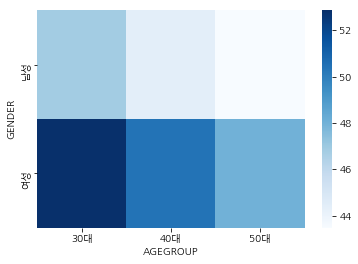

In [36]:
# p. 78
df_agg=df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).agg("mean")
df_pivot = df_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(df_pivot,cmap="Blues")

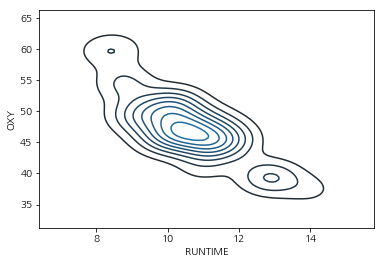

In [37]:
#p.81
"""
커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.
    kdeplot: http://seaborn.pydata.org/generated/seaborn.kdeplot.html
"""
sns.kdeplot(df_fitness["RUNTIME"],df_fitness["OXY"],shade=False)

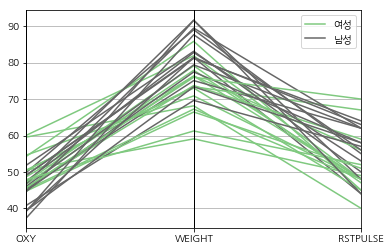

In [42]:
"""
p.84
"""

pd.plotting.parallel_coordinates(df_fitness,"GENDER",cols=["OXY","WEIGHT","RSTPULSE"],colormap="Accent")

Text(486.5477272727271, 0.5, '혈당 산소 요구량')

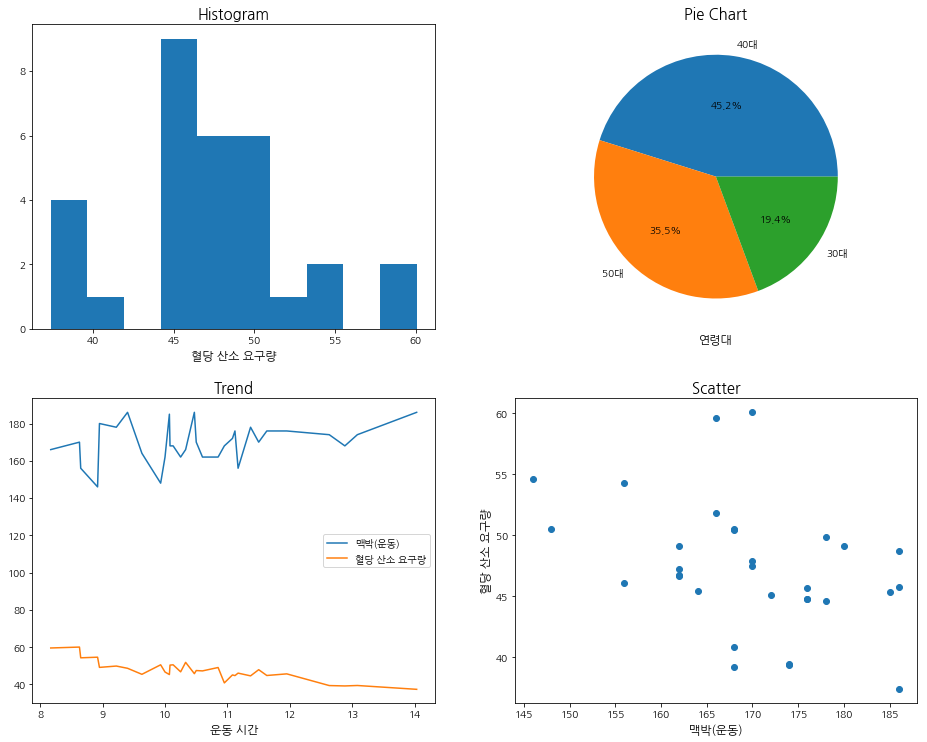

In [48]:
"""
p.87
"""
df_count=df_fitness["AGEGROUP"].value_counts()
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)

axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram",fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량",fontsize=12)

axes[0,1].pie(df_count,labels=df_count.index.tolist(),autopct="%.1f%%")
axes[0,1].set_title("Pie Chart",fontsize=15)
axes[0,1].set_xlabel("연령대",fontsize=12)

axes[1,0].plot("RUNTIME","RUNPULSE",data=df_fitness,label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY",data=df_fitness,label="혈당 산소 요구량")
axes[1,0].set_title("Trend",fontsize=15)
axes[1,0].set_xlabel("운동 시간",fontsize=12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE","OXY",data=df_fitness)
axes[1,1].set_title("Scatter",fontsize=15)
axes[1,1].set_xlabel("맥박(운동)",fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)

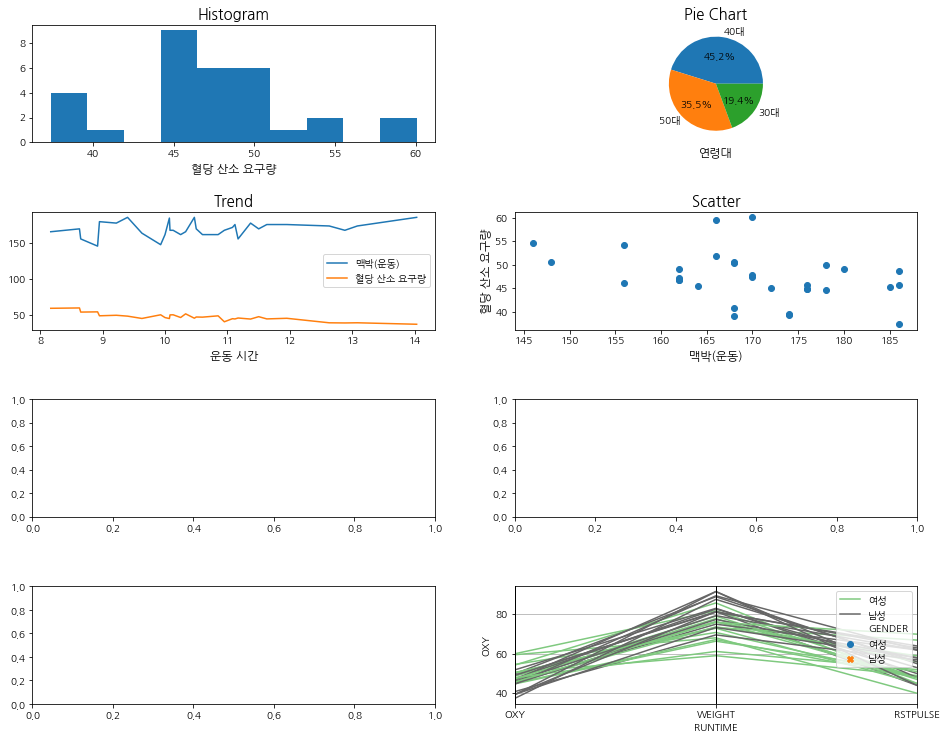

In [52]:
"""
p.87
"""
df_count=df_fitness["AGEGROUP"].value_counts()
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)

axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram",fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량",fontsize=12)

axes[0,1].pie(df_count,labels=df_count.index.tolist(),autopct="%.1f%%")
axes[0,1].set_title("Pie Chart",fontsize=15)
axes[0,1].set_xlabel("연령대",fontsize=12)

axes[1,0].plot("RUNTIME","RUNPULSE",data=df_fitness,label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY",data=df_fitness,label="혈당 산소 요구량")
axes[1,0].set_title("Trend",fontsize=15)
axes[1,0].set_xlabel("운동 시간",fontsize=12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE","OXY",data=df_fitness)
axes[1,1].set_title("Scatter",fontsize=15)
axes[1,1].set_xlabel("맥박(운동)",fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)

"""
sns.scatterplot(x="RUNTIME", y="OXY", hue = "GENDER", style="GENDER",data=df_fitness)
pd.plotting.parallel_coordinates(df_fitness,"GENDER",cols=["OXY","WEIGHT","RSTPULSE"],colormap="Accent")
axes를 지정하지 않고 그래프만 그리면 맨 마지막 자리에 제일 마지막 그래프만 출력됨
"""